<a href="https://colab.research.google.com/github/rocodoco20/AI1week/blob/main/cuda_psy_4Hweek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 수능 국어 문제 GPT-4로 풀어보기

이번 과제에서는 2023년도 수능 국어 문제를 GPT-4로 풀어볼 것입니다. 아래 요구사항들을 지켜주시면 됩니다.

- [ ]  수능 국어 문제를 준비합니다. 다음 github의 `data > 2023_11_KICE.json` data를 colab으로 불러오시면 됩니다:

In [ ]:
# 라이브러리 설치
!pip install transformers datasets evaluate accelerate scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# 필요한 모듈 임포트
import random
import evaluate
import numpy as np
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import requests

# datasets 라이브러리로 JSON 파일 불러오기
kice_dataset = load_dataset("json", data_files="https://raw.githubusercontent.com/rocodoco20/AI1week/main/2023_11_KICE.json")
print("KICE 데이터셋:", kice_dataset)

Generating train split: 0 examples [00:00, ? examples/s]

KICE 데이터셋: DatasetDict({
    train: Dataset({
        features: ['id', 'paragraph', 'type', 'problems'],
        num_rows: 11
    })
})


In [ ]:
kice_dataset['train'][0]

{'id': '2023_11_KICE_1-3',
 'paragraph': '사람들이 지속적으로 책을 읽는 이유 중 하나는 즐거움이다. 독서의 즐거움에는 여러 가지가 있겠지만 그 중심에는 ‘소통의 즐거움’이 있다.독자는 독서를 통해 책과 소통하는 즐거움을 경험한다. 독서는필자와 간접적으로 대화하는 소통 행위이다. 독자는 자신이 속한사회나 시대의 영향 아래 필자가 속해 있거나 드러내고자 하는 사회나 시대를 경험한다. 직접 경험하지 못했던 다양한 삶을 필자를 매개로 만나고 이해하면서 독자는 더 넓은 시야로 세계를바라볼 수 있다. 이때 같은 책을 읽은 독자라도 독자의 배경지식이나 관점 등의 독자 요인, 읽기 환경이나 과제 등의 상황 요인이 다르므로, 필자가 보여 주는 세계를 그대로 수용하지 않고 저마다 소통 과정에서 다른 의미를 구성할 수 있다.[A] (이러한 소통은 독자가 책의 내용에 대해 질문하고 답을 찾아내는 과정에서 가능해진다. 독자는 책에서 답을 찾는 질문, 독자 자신에게서 답을 찾는 질문 등을 제기할 수 있다. 전자의 경우 책에 명시된 내용에서 답을 발견할 수 있고, 책의 내용들을 관계 지으며 답에 해당하는 내용을 스스로 구성할 수도 있다. 또한 후자의 경우 책에는 없는 독자의 경험에서 답을 찾을 수 있다. 이런 질문들을 풍부히 생성하고 주체적으로 답을 찾을 때 소통의 즐거움은 더 커진다.)한편 독자는 ㉠ (다른 독자와 소통하는 즐거움을 경험할 수도 있다.) 책과의 소통을 통해 개인적으로 형성한 의미를 독서 모임이나 독서 동아리 등에서 다른 독자들과 나누는 일이 이에 해당한다. 비슷한 해석에 서로 공감하며 기존 인식을 강화하거나 관점의 차이를 확인하고 기존 인식을 조정하는 과정에서, 독자는자신의 인식을 심화 확장할 수 있다. 최근 소통 공간이 온라인으로 확대되면서 독서를 통해 다른 독자들과 소통하며 즐거움을누리는 양상이 더 다양해지고 있다. 자신의 독서 경험을 담은 글이나 동영상을 생산 공유함으로써, 책을 읽지 않은 타인이 책과 소통하도록 돕는 것도 책을 

## [MY CODE] tokenizer 생성 및 데이터 평탄화

In [ ]:

# 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# 데이터셋 평탄화
def flatten_problems(dataset):
    flat_data = []
    for example in dataset:
        paragraph = example["paragraph"]
        for problem in example["problems"]:
            flat_data.append({
                "paragraph": paragraph,
                "question": problem["question"],
                "answer": problem["answer"],
                "choices": problem["choices"],  # 포함
                "score": problem["score"],
            })
    return flat_data

flat_data = flatten_problems(kice_dataset["train"])

# 평탄화된 데이터셋 생성
flat_dataset = Dataset.from_dict({
    "paragraph": [x["paragraph"] for x in flat_data],
    "question": [x["question"] for x in flat_data],
    "answer": [x["answer"] for x in flat_data],
    "choices": [x["choices"] for x in flat_data],
    "score": [x["score"] for x in flat_data],
})

# 전처리 함수
def preprocess_function(data):
    tokenized_data = tokenizer(
        data["paragraph"], data["question"],
        truncation=True, padding="max_length", max_length=512
    )
    tokenized_data["labels"] = data["answer"]
    return tokenized_data

# 전처리 및 토크나이징
tokenized_dataset = flat_dataset.map(
    preprocess_function,
    batched=True
)

# 결과 확인
print(tokenized_dataset[0]["choices"])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

['같은 책을 읽은 독자라도 서로 다른 의미를 구성할 수 있다.', '다른 독자와의 소통은 독자가 인식의 폭을 확장하도록 돕는다', '독자는 직접 경험해 보지 못했던 다양한 삶을 책의 필자를 매개로 접할 수 있다.', '독자의 배경지식, 관점, 읽기 환경, 과제는 독자의 의미 구성에 영향을 주는 독자 요인이다.', '독자는 책을 읽을 때 자신이 속한 사회나 시대의 영향을 받으며 필자와 간접적으로 대화한다']


## [MY CODE] GPT 설치

In [ ]:
!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.57.4
    Uninstalling openai-1.57.4:
      Successfully uninstalled openai-1.57.4


## [MY CODE] 민감한 정보를 코드에 직접 입력하는 것은 피하고, 환경 변수나 .env 파일을 사용하여 API 키를 관리

In [ ]:
!pip install python-dotenv

## [MY CODE] GPT API 호출

In [ ]:
from dotenv import load_dotenv
import os
import openai
load_dotenv("/content/key.env")  # .env 파일을 로드

openai.api_key = os.getenv("OPENAI_API_KEY")


## [LOG] 문제풀이 및 로그

In [ ]:
import time

Sscore = 0  # 정답 맞춘 점수
total_score = 0  # 전체 점수 변수 초기화
correct = 0  # 정답 맞춘 문제 수
retry_count = 0  # 재시도 횟수 변수 추가
answer_text = "번호로 하나를  선택하고 숫자. 이유 형식 숫자뒤에 . 말고는 다른 걸 붙이지마 간단하게 20자 이내로 설명해."

# GPT-4를 사용하여 문제를 해결하는 prediction 함수
def prediction(problem):
    print(f" question : {problem['question']}")
    prompt = (
        f"문단: {problem['paragraph']}\n"
        f"질문: {problem['question']}\n"
        f"선택지:\n"
        + "\n".join([f"{i + 1}. {choice}" for i, choice in enumerate(problem['choices'])]) + "\n" +
        answer_text
    )

    # GPT-4 API 호출
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "system", "content": "당신은 수능 국어 문제를 푸는 전문가입니다."},
                  {"role": "user", "content": prompt}]
    )

    # GPT의 응답에서 숫자 추출
    gpt_response = response['choices'][0]['message']['content'].strip()
    print(f" gpt_response : {gpt_response}")

    try:
        # 응답에서 번호 추출
        answer_number = int(gpt_response.split('.')[0].strip())
        return answer_number
    except ValueError:
        # 번호가 없으면 기본값 반환
        return -1

# 모든 문제에 대해 GPT-4의 점수를 계산하는 코드
def evaluate_model(dataset, batch_size=5, target_score=80):
    global Sscore, total_score, correct, retry_count  # 전역 변수 참조

    total = len(dataset)
    incorrect_problems = []

    # 데이터셋을 배치 처리하는 부분
    for i in range(0, total, batch_size):
        batch = dataset.select(range(i, min(i + batch_size, total)))

        # 배치 내 문제들을 처리
        for index, problem in batch.to_pandas().iterrows():
            # problem은 이제 pandas Series로, 이를 딕셔너리로 변환
            problem = problem.to_dict()

            prediction_result = prediction(problem)
            total_score += problem['score']  # 전체 점수 누적
            if prediction_result == problem['answer']:
                print(f" 정답 : {problem['score']}")
                Sscore += problem['score']  # 정답 맞춘 문제의 점수 합산
                correct += 1
            else:
                print(f" 오답 : {problem['score']}")
                # 오답 문제의 'question'에 이전에 고른 답 추가
                problem['question'] = f"{answer_text} {problem['question']} 니가 전에 고른 오답은 {prediction_result} 번이야"
                incorrect_problems.append(problem)

            time.sleep(20)  # 20초 대기 (필요시 조정 가능)
            print(f" ------------------------------------------------------------------------------------------------------ ")
        # 배치 처리 후 대기
        print(f"Processed batch {i // batch_size + 1}/{(total + batch_size - 1) // batch_size}")

    # 최종 결과 출력
    accuracy = (correct / total) * 100  # 정답 맞춘 비율
    print(f"정확도: 총점 {Sscore}/{total_score} | 정답률: {accuracy}%")

    # 총점이 80점 이하이면 재평가
    if Sscore < target_score:
        retry_count += 1  # 재시도 횟수 증가
        print(f"총점이 {target_score} 미만이므로 재평가를 시작합니다. (재시도 횟수: {retry_count})")

        # 오답 문제들로 새로운 데이터셋을 생성하여 재평가 호출
        new_dataset = Dataset.from_dict({
            "paragraph": [x["paragraph"] for x in incorrect_problems],
            "question": [x["question"] for x in incorrect_problems],
            "answer": [x["answer"] for x in incorrect_problems],
            "choices": [x["choices"] for x in incorrect_problems],
            "score": [x["score"] for x in incorrect_problems],
        })

        # 재평가 실행
        evaluate_model(new_dataset, batch_size=batch_size, target_score=target_score)

    return accuracy


# 데이터셋 평탄화 후 평가 실행
evaluate_model(flat_dataset)


 question : 윗글의 내용과 일치하지 않는 것은?
 gpt_response : 4. 과제는 상황 요인이다.
 정답 : 2
 ------------------------------------------------------------------------------------------------------ 
 question : 다음은 학생이 독서 후 작성한 글의 일부이다. [A]를 바탕으로 ⓐ～ⓔ를 이해한 내용으로 가장 적절한 것은?
 gpt_response : 3. ⓐ에는 '책에서 답을 찾는 질문'이며, ⓔ에는 '독자의 경험'에서 답을 찾아내는 내용이다.
 오답 : 3
 ------------------------------------------------------------------------------------------------------ 
 question : 윗글을 읽고 ㉠에 대해 보인 반응으로 적절하지 않은 것은?
 gpt_response : 1. 개인 독서는 소통이 아니다.
 정답 : 2
 ------------------------------------------------------------------------------------------------------ 
 question : (가)와 (나)에 대한 설명으로 가장 적절한 것은?
 gpt_response : 4. 가는 유서 특성, 나는 학문 수용 양상 소개
 정답 : 2
 ------------------------------------------------------------------------------------------------------ 
 question : [A]에 대한 이해로 적절하지 않은 것은?
 gpt_response : 5. 중국 유서는 상호 비교나 해석 보다는 필요한 부분의 발췌가 주를 이룸.
 정답 : 2
 ------------------------------------------------------------------------

82.22222222222221

## [LOG] 시각화

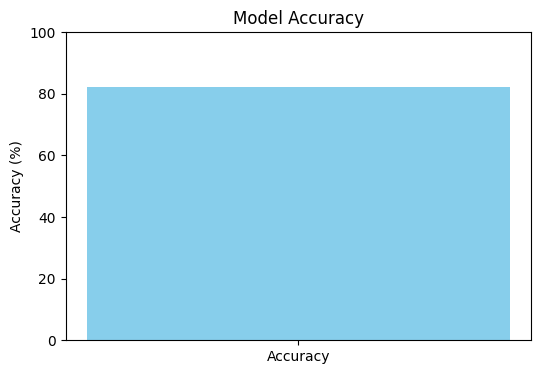

 --------------------------------------------------------------------------------- 


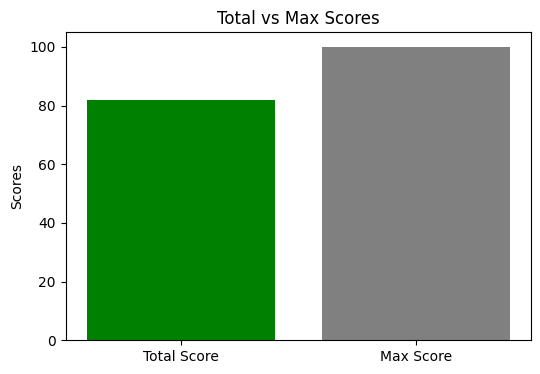

 --------------------------------------------------------------------------------- 


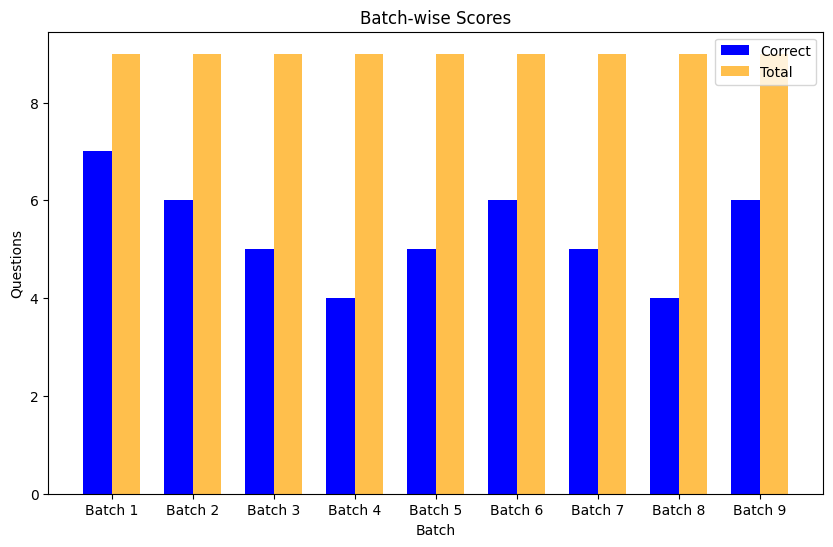

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 예시
results = {
    "total_score": 82,
    "max_score": 100,
    "accuracy": 82.22,
    "batches": [
        {"batch": 1, "correct": 7, "total": 9},
        {"batch": 2, "correct": 6, "total": 9},
        {"batch": 3, "correct": 5, "total": 9},
        {"batch": 4, "correct": 4, "total": 9},
        {"batch": 5, "correct": 5, "total": 9},
        {"batch": 6, "correct": 6, "total": 9},
        {"batch": 7, "correct": 5, "total": 9},
        {"batch": 8, "correct": 4, "total": 9},
        {"batch": 9, "correct": 6, "total": 9}
    ]
}

# 정확도 시각화
def visualize_accuracy(results):
    plt.figure(figsize=(6, 4))
    plt.bar(["Accuracy"], [results["accuracy"]], color="skyblue")
    plt.ylim(0, 100)
    plt.ylabel("Accuracy (%)")
    plt.title("Model Accuracy")
    plt.show()

# 점수 시각화
def visualize_scores(results):
    plt.figure(figsize=(6, 4))
    labels = ["Total Score", "Max Score"]
    scores = [results["total_score"], results["max_score"]]
    plt.bar(labels, scores, color=["green", "gray"])
    plt.ylabel("Scores")
    plt.title("Total vs Max Scores")
    plt.show()

# 배치별 점수 시각화
def visualize_batch_scores(results):
    batches = [batch["batch"] for batch in results["batches"]]
    correct = [batch["correct"] for batch in results["batches"]]
    total = [batch["total"] for batch in results["batches"]]

    x = np.arange(len(batches))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, correct, width, label="Correct", color="blue")
    plt.bar(x + width/2, total, width, label="Total", color="orange", alpha=0.7)

    plt.xlabel("Batch")
    plt.ylabel("Questions")
    plt.title("Batch-wise Scores")
    plt.xticks(x, [f"Batch {b}" for b in batches])
    plt.legend()
    plt.show()

# 시각화 실행
visualize_accuracy(results)
print(' --------------------------------------------------------------------------------- ')
visualize_scores(results)
print(' --------------------------------------------------------------------------------- ')
visualize_batch_scores(results)


## README: GPT-4 기반 국어 문제 풀이 및 점수 평가 시스템

### Q1) 어떤 task를 선택하셨나요?  
> **Task 이름**:
> 국어 시험 문제 풀이 및 점수 평가 자동화 시스템.  
>
> **목적**:
> GPT-4를 활용하여 국어 시험 문제를 풀고, 정답 여부를 평가하며 점수를 계산하는 시스템입니다. 오답일 경우 문제를 다시 평가하는 로직을 포함하여 모델의 성능을 점검합니다.

---

### Q2) 모델은 어떻게 설계하셨나요? 설계한 모델의 입력과 출력 형태가 어떻게 되나요?  
> **모델 구조**:  
> OpenAI GPT-4 API를 활용하여 문제를 예측합니다. 전체 시스템은 문제 데이터셋을 순회하며 GPT-4로 정답을 예측하고, 이를 실제 정답과 비교하는 방식으로 설계되었습니다.  
>  
> **입력 형태**:  
> - 입력 데이터: 문제의 구성 요소인 `paragraph`(문단), `question`(질문), `choices`(선택지 리스트), `answer`(정답 번호), `score`(문제 점수).  
> - 전처리 방식: 데이터를 배치 단위로 나눠 처리하며, GPT-4로 전달할 질문을 문단과 함께 프롬프트 형식으로 구성합니다.  
>
> **출력 형태**:  
> - GPT-4 응답: 정답 번호와 간단한 이유.
> - 평가 결과:
>   - 총점(Sscore)
>   - 정답률(Accuracy)
>   - 재시도 횟수(Retry Count).

---

### Q3) 어떤 pre-trained 모델을 활용하셨나요?  
> **모델 이름**:  
> OpenAI의 GPT-4.  
>  
> **이유**:  
> GPT-4는 한국어에 대한 뛰어난 자연어 처리 능력을 보유하고 있으며, 주어진 문단과 질문에 대해 정확한 답변을 제공할 가능성이 높습니다.
>  
> **활용 방식**:  
> GPT-4의 Zero-shot 학습을 활용하여 문제를 해결합니다. 추가적인 fine-tuning 없이 사전 학습된 모델을 바로 사용하였습니다.

---

### Q4) 실제로 pre-trained 모델을 fine-tuning했을 때 loss curve는 어떻게 그려지나요? 그리고 pre-train 하지 않은 Transformer를 학습했을 때와 어떤 차이가 있나요?  
> **Fine-tuning 결과**:  
> 이 프로젝트는 GPT-4의 fine-tuning을 포함하지 않고 API를 통해 pre-trained 모델만 사용합니다. 따라서 loss curve는 제공되지 않습니다.  
>  
> **Pre-trained vs Non Pre-trained**:  
> - **Pre-trained 사용 장점**: 높은 정확도, 빠른 응답 속도, 기존 데이터셋 학습 불필요.  
> - **Non Pre-trained 사용 단점**: 학습 비용과 시간이 많이 들며, 국어 문제와 같은 복잡한 과제에서 성능이 떨어질 가능성 있음.

---

### 시스템 설명

#### 1. 주요 기능
- **문제 풀이**:
  - GPT-4에 문단과 질문, 선택지를 전달하여 정답 번호를 예측.
  - 예측된 답과 실제 정답 비교.

- **점수 계산 및 평가**:
  - 정답 점수를 누적하여 총점(Sscore) 계산.
  - 정답률(Accuracy) 및 총점 기준으로 결과 출력.

- **오답 재평가**:
  - 오답 문제를 모아 새로운 데이터셋 생성.
  - 재평가 시 질문에 "니가 전에 고른 오답" 정보를 추가하여 다시 GPT-4에 전달.

#### 2. 코드 구성 요소
- **`prediction(problem)`**:
  - GPT-4 API 호출하여 문제를 해결.
  - 문제의 문단, 질문, 선택지를 프롬프트로 구성.

- **`evaluate_model(dataset, batch_size, target_score)`**:
  - 주어진 데이터셋을 배치 단위로 처리하며 점수와 정답률을 계산.
  - 총점이 목표 점수(target_score) 이하일 경우 오답 문제를 재평가.

#### 3. 재시도 로직
- 점수가 목표 점수(기본값 80점) 이하일 경우:
  - 오답 문제만을 포함한 새로운 데이터셋 생성.
  - 재시도 횟수(retry_count)를 증가시키며 재평가.

#### 4. 입력 및 출력 예시
**입력 데이터 구조:**
```python
{
    "paragraph": "문단 내용",
    "question": "질문 내용",
    "choices": ["선택지1", "선택지2", "선택지3", "선택지4"],
    "answer": 2,  # 정답 번호
    "score": 5    # 문제 점수
}
```

**출력 예시:**
```
Processed batch 1/2
 정답 : 5
 오답 : 3
 정확도: 총점 8/10 | 정답률: 80%
총점이 80점 미만이므로 재평가를 시작합니다. (재시도 횟수: 1)
```

---

### 사용법
1. `key.env` 파일 생성 후 OpenAI API 키 저장:
```
OPENAI_API_KEY=sk-xxx...
```

2. 코드 실행:
```bash
python evaluate_model.py
```

3. 데이터셋:
- `flat_dataset` 변수를 통해 입력 데이터를 제공.

---

### 개선 및 추가 가능 사항
- 데이터셋 자동 로딩 및 사전 전처리 기능 추가.
- Batch 처리 속도 최적화를 위해 API 호출 간 대기 시간 조정.
- Fine-tuning된 모델과의 비교 실험 추가.
- 결과 저장 및 시각화 기능 구현.

